<a href="https://colab.research.google.com/github/kishor0896/playstorereviewanalysis/blob/main/Copy_of_Copy_of_Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# IMPORTING THE REQUIRED LIBRARIES:

In [2]:
#for numerical computation and data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for removing future warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **LOADING THE PLAYSTORE DATA FILES**

In [5]:
path_1 = "/content/drive/MyDrive/Colab Notebooks/Python/play store app review data capstone project-1/Copy of Play Store Data.csv"
path_2 = "/content/drive/MyDrive/Colab Notebooks/Python/play store app review data capstone project-1/Copy of User Reviews.csv"



#Dataset of Playstore apps
df_app= pd.read_csv(path_1)

#Dataset of Playstore apps user review 
df_review = pd.read_csv(path_2)

working_path = path_1 + path_2

# DATA EXPLORATION:

In [6]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_app.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
df_review.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [10]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Here in the playstore data we can see that there a few Null values in Current version and Android version & one null value in Type

There is a huge number null values in the rating column so we will start with that but first lets check the other data set

The columns reviews, size and price are object type values we need to convert them to float as wel

In [12]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In the user review data set almost all the columns have huge number of null value. We will get back to this data set later

# DATA WRANGLING IN PLAYSTORE DATA.CSV :

In the playstore data.csv there is too many missing file in the Rating column compared to other columns. Lets see the details of that column

In [13]:
df_app['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The max value in the rating column is 19 but the highest value rating can have is 5,there must be some anomaly, lets check:

We will do a box graph to visualise the anomaly and see if there is only one or more that one

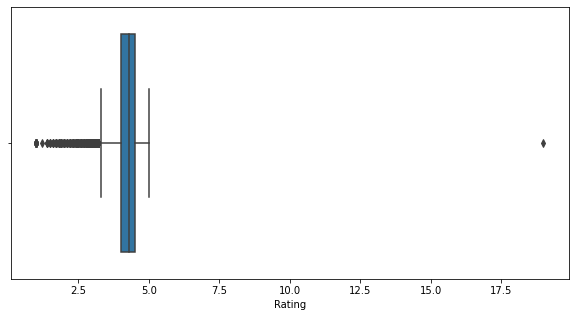

In [14]:
#Creating a box graph for the rating column
plt.figure(figsize = (10,5))
sns.boxplot(df_app['Rating'], x='Rating')


We can clearly see that there is atleast one value greater that 5, we will check if there are others using a simple code.

In [15]:
df_app[df_app['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Only a single row has the rating of above 5. We will drop the particular row:

In [16]:
df_app.drop([10472], inplace=True)

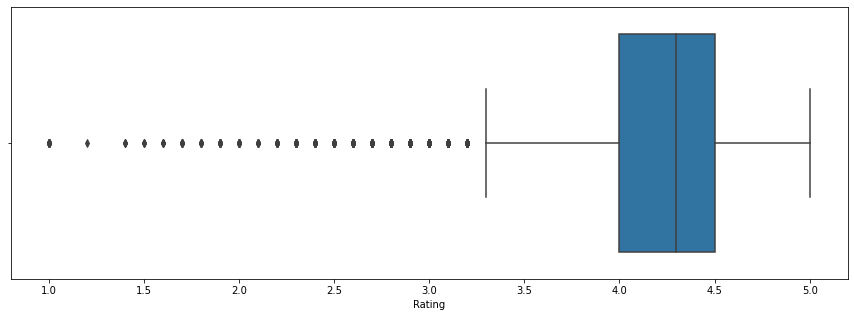

In [17]:
#Lets do the same box plot again:

plt.figure(figsize = (15,5))
sns.boxplot(df_app['Rating'], x='Rating')

That's better! Now the range of rating is between 1-5

Now we need to treat the NaN values. Higest number of the NaN values were in the Rating column we cannot drop so many values lets se if we can replace them in any way

In [18]:
#lets see the describe() for the rating column:
df_app['Rating'].isnull().sum()

1474

As we can see there is 1474 Null values we cannot drop them we need to replace them best way would be to replace them with the mean or median value of the set.

Let's compare:

In [19]:
df_app['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [20]:
df_app['Rating'].fillna(df_app['Rating'].median()).describe() #replacing using median()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [21]:
df_app['Rating'].fillna(df_app['Rating'].mean()).describe() #replacing using mean()

count    10840.000000
mean         4.191757
std          0.478907
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64


Using Median() gives us a closer result to the original



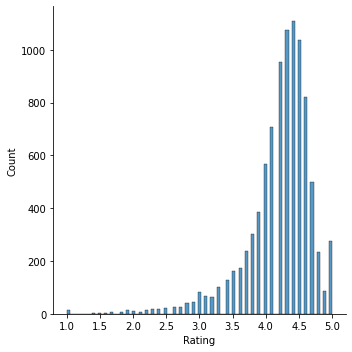

In [22]:
sns.displot(df_app['Rating'])

Plus we can see from the above distplot appears skewed to left. So the median is usually preferred in measures of central tendency when your data set is skewed

Replacing using median is a better option by comparision so lets do that!

In [23]:
df_app['Rating'].fillna(df_app['Rating'].median(), inplace=True)
df_app.describe()

,Rating
count,10840.000000
mean,4.206476
std,0.480342
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [24]:
df_app['Rating'].isnull().sum()

0

In [25]:
#Checking the null values for other columns:
df_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Very few rows have null values so we can drop these!

In [26]:
df_app = df_app.dropna()

In [27]:
df_app.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now that there are no null values lets do some other data cleaning!

Lets start with reviews column

In [28]:
df_app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [29]:
df_app['Reviews'].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [30]:
#Lets change the type of the Reviews.Int type is the best option.

df_app['Reviews'] = df_app['Reviews'].astype('int')
df_app['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

Nothing more needs to be done in the review column. Lets move on to the size column.

In [31]:
df_app['Size'].describe()

count                  10829
unique                   457
top       Varies with device
freq                    1694
Name: Size, dtype: object

In [32]:
df_app['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Almost all the data here is pretty standard, except the observation that is 'Varies with device'. Lets check the total number of that observation.



In [33]:
df_app[df_app['Size']=='Varies with device'].count()

App               1694
Category          1694
Rating            1694
Reviews           1694
Size              1694
Installs          1694
Type              1694
Price             1694
Content Rating    1694
Genres            1694
Last Updated      1694
Current Ver       1694
Android Ver       1694
dtype: int64

*A total of 1694 rows, we cannot drop so many rows lets just change those values to N/A*
*And use lambda function to convert Strings of different MB and KB to Float type MB*

In [34]:
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_app['Size'] = df_app['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x) # 1 MB is equal to 1024 KB
df_app['Size'] = df_app['Size'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
df_app['Size'] = df_app['Size'].astype('float')

In [35]:
df_app['Size'].describe()

count    9135.000000
mean       21.534596
std        22.593997
min         0.008301
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: Size, dtype: float64

In [36]:
#Lets check price column
df_app['Price'].describe()

count     10829
unique       92
top           0
freq      10032
Name: Price, dtype: object

In [37]:
df_app['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

There are $ symbols in the price column and those must be removed

In [38]:
df_app['Price'] = df_app['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
df_app['Price'] = df_app['Price'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
df_app['Price'] = df_app['Price'].astype('float')

In [39]:
df_app['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

We should remove the Plus symbol from the Installs as well!

In [40]:
df_app['Installs'] = df_app['Installs'].apply(lambda x: str(x).replace('Free', 'NaN') if 'Free' in str(x) else x)
df_app['Installs'] = df_app['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df_app['Installs'] = df_app['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df_app['Installs'] = df_app['Installs'].apply(lambda x: float(x))

We are almost done with the cleaning lets see if there are any duplicate values.

In [41]:
df_app['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9648, dtype: int64

We can see that there are some apps for which there are multiple observations.Lets start with the one called ROBLOX

In [42]:
df_app[df_app['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Almost all the values are same except for the categories. We will keep one from the GAME category and one from the FAMILY category and lets drop the rest

In [43]:
df_app = df_app.drop_duplicates(['App','Category'])
df_app['App'].value_counts()

Netflix                                          2
LEGO® TV                                         2
DC Super Hero Girls™                             2
Princess Coloring Book                           2
Chess Free                                       2
                                                ..
F-Sim Space Shuttle                              1
Weather Live                                     1
Norwegian For Kids & Babies F                    1
R+F PULSE                                        1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9648, dtype: int64

In [44]:
df_app[df_app['App'] == 'Netflix']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
855,Netflix,ENTERTAINMENT,4.4,5456208,NaN,100000000.0,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device
3889,Netflix,FAMILY,4.4,5453997,NaN,100000000.0,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device


Okay so we can see almost all the duplicate values has been deleted some of the Apps have 2 observation but they are categorized differently so we will keep those!

Now lets check out the other Data set!

# DATA WRANGLING IN USER REVIEWS.CSV

In [45]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [46]:
df_review.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [47]:
df_review[1000:1010]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1000,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1001,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1002,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1003,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1004,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1005,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1006,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1007,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN
1008,4K Wallpapers and Ultra HD Backgrounds,Superb love wallpapers give confidence wheneve...,Positive,0.75,0.8
1009,4K Wallpapers and Ultra HD Backgrounds,NaN,NaN,NaN,NaN


In [48]:
df_review.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [49]:
df_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

As we can see here half the data sets have null value we have no option but to drop those

In [50]:
df_review.dropna(inplace = True)

In [51]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


All the null values have been dropped. There's nothing more to do here

Lets merge the two data sets on the 'App' column and store it in a variable, maybe it will be useful later

In [52]:
merged_df = pd.merge(df_review,df_app, on='App', how='outer')
merged_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


Great! Now that we are done with the Data cleaning lets move on to visualization!